# Mitigation bias in recommender systems

This is an introduction to fairness in recommender systems. A recommender system aims to recommend the best item according to the user preference. In this tutorial, we will focus on the task of correctly predicting users' music preference.

A recommender system can be biased in multiple ways. For example, we may be concerned that the artists in our database will not get equal representation (item fairness). Alternative, our main concern may be that different groups of users (e.g. male/female users) will get different music recommendations (user fairness). In the following, we will show how to explore the data for fairness, and measure these various types of fairness using the holisticai library.

## Importing the data

We will start by importing the example dataset, which we host on our library. The [datatset](https://www.kaggle.com/datasets/ravichaubey1506/lastfm) contains a set of artists that were downloaded by users. It includes personal information about the user, specifically sex and country of origin. A user can download more than one artist. We will use the column "score", which contains only 1s for counting the interactions.

In [1]:
# sys path
import sys
sys.path.append('../../')


In [20]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
from holisticai.datasets import load_last_fm

bunch = load_last_fm()
lastfm = bunch['frame']
lastfm['score'] = np.random.randint(1,5, len(lastfm))
lastfm['sex'] = lastfm['sex']=='m'
lastfm  = lastfm.drop_duplicates()
lastfm.head()

,user,artist,sex,country,score
0,1.0,red hot chili peppers,False,Germany,1
1,1.0,the black dahlia murder,False,Germany,3
2,1.0,goldfrapp,False,Germany,4
3,1.0,dropkick murphys,False,Germany,1
4,1.0,le tigre,False,Germany,3


In [21]:
from holisticai.utils import recommender_formatter
df_pivot, p_attr = recommender_formatter(lastfm, users_col='user', groups_col='sex', 
                                         items_col='artist', scores_col='score', aggfunc='mean')
data_matrix = df_pivot.fillna(0).to_numpy()

In [22]:
import numpy as np
from holisticai.mitigation.bias import DisparateImpactRemover
dir = DisparateImpactRemover(repair_level=1)
new_data_matrix = dir.transform(data_matrix, group_a=p_attr, group_b=1-p_attr)

(0.0, 22.0)

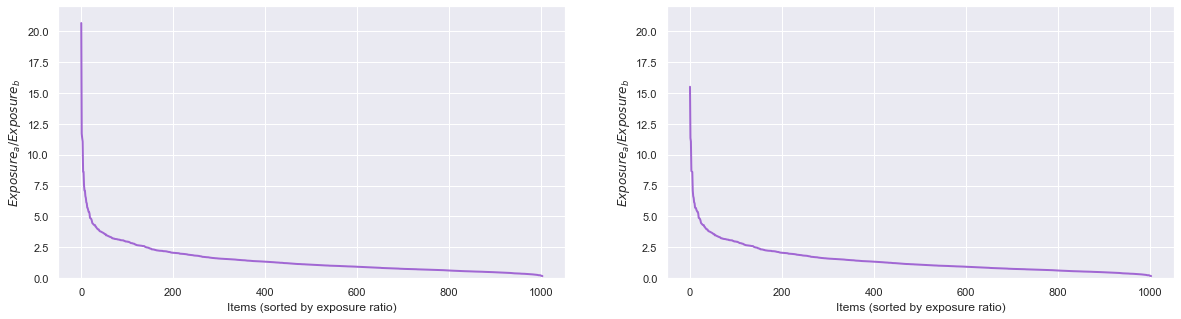

In [50]:
from holisticai.plots.bias import exposure_ratio_plot
import matplotlib.pyplot as plt 

fig,axes = plt.subplots(1,2, figsize=(20,5))
exposure_ratio_plot(group_a=p_attr, group_b=1-p_attr, mat_pred=data_matrix, ax=axes[0])
axes[0].set_ylim([0,22])
exposure_ratio_plot(group_a=p_attr, group_b=1-p_attr, mat_pred=new_data_matrix, ax=axes[1])
axes[1].set_ylim([0,22])